In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

import tensorflow as tf

import random

from keras.models import Sequential
from keras.layers import Input, Dense, MaxPooling2D, Conv2D, Flatten, Reshape
from keras.optimizers import Adam
from keras import regularizers
from keras import optimizers
from keras import initializers
from keras.preprocessing import image

import keras.backend as K

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.patches as patches

Using TensorFlow backend.


In [15]:
# Read images
images = np.zeros((1662,260,400))

for i in range(480):
    filename = 'dataOpenedEye/openedEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i] = img

for i in range(81):
    filename = 'dataPavel/pavelEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+480] = img
    
for i in range(74):
    filename = 'dataYannick/yannickEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+561] = img

for i in range(75):
    filename = 'dataKevin/kevinEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+635] = img 

for i in range(216):
    filename = 'dataAli/aliEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+710] = img
    
for i in range(209):
    filename = 'dataMarie/marieEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+926] = img
    
for i in range(199):
    filename = 'dataHelene/heleneEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+1135] = img
       

for i in range(209):
    filename = 'dataJade/jadeEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+1334] = img

for i in range(119):
    filename = 'dataYoussef/youssefEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+1543] = img    

    
images = np.reshape(images, (images.shape[0], images.shape[1], images.shape[2], 1))

# Rescale images
images = images/255.


def addGlint(image):
    randGlint = random.randint(0,1)
    if(randGlint):
        x = random.randint(10, 390)
        y = random.randint(10, 250)

        image[x-8:x+8, y-8:y+8] = 255
        
    return image

#for image in images:
#    image = addGlint(image)


images.shape

(1662, 260, 400, 1)

In [16]:
# Read target values
target1 = pd.read_csv('dataOpenedEye/dataPupilCenter.csv')
target2 = pd.read_csv('dataPavel/pavelPupilCenter.csv')
target3 = pd.read_csv('dataYannick/yannickPupilCenter.csv')
target4 = pd.read_csv('dataKevin/kevinPupilCenter.csv')
target5 = pd.read_csv('dataAli/aliPupilCenter.csv')
target6 = pd.read_csv('dataMarie/mariePupilCenter.csv')
target7 = pd.read_csv('dataHelene/helenePupilCenter.csv')
target8 = pd.read_csv('dataJade/jadePupilCenter.csv')
target9 = pd.read_csv('dataYoussef/youssefPupilCenter.csv')
target = [target1, target2, target3, target4, target5, target6, target7, target8, target9]
target = pd.concat(target)

target.shape

(1662, 5)

In [17]:
# Remove missing values
images = images[target.xcentral != '?']
target = target[target.xcentral != '?']
target = target.astype('float32')
target.shape

(1590, 5)

In [18]:
# Put target data in shape
targetX = target['xcentral'].values.reshape((target['xcentral'].shape[0], 1))
targetY = target['ycentral'].values.reshape((target['ycentral'].shape[0], 1))

# Rescale targets between 0 and 1 
targetX = targetX/400.
targetY = targetY/260.

targetTrain = np.concatenate((targetX, targetY), axis=1)
targetTrain.shape

(1590, 2)

In [19]:
# Data augmentation by adding horizontal mirror images
imagesFlipped = np.flip(images, axis=2)

targetFlipped = np.zeros(targetTrain.shape)
targetFlipped[:,0] = 1-targetTrain[:,0]
targetFlipped[:,1] = targetTrain[:,1]

images = np.concatenate((images, imagesFlipped), axis=0)
targetTrain = np.concatenate((targetTrain, targetFlipped), axis=0)

In [20]:
# Shuffle data
xtrain, ytrain = shuffle(images, targetTrain, random_state=0)
xvalid = xtrain[2500:]
#xtest = xtrain[2500:]
xtrain = xtrain[:2500]
yvalid = ytrain[2500:]
#ytest = ytrain[2500:]
ytrain = ytrain[:2500]

In [21]:
def model(Xshape):
    
    mod = Sequential()
    
    mod.add(Reshape((Xshape[0]*Xshape[1],), input_shape=(Xshape)))
    mod.add(Dense(64, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00001)))
    mod.add(Dense(64, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00001)))
    mod.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00001)))
    mod.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00001)))
    mod.add(Dense(16, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.0001)))
    mod.add(Dense(16, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.0001)))
    mod.add(Dense(8, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.0005)))
    mod.add(Dense(2, activation='sigmoid', kernel_initializer='glorot_normal'))
    
    return mod

In [22]:
mymodel = model(xtrain.shape[1:])
opt = optimizers.Adam(lr=0.0001)
mymodel.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [23]:
# First train with small mini batch size and default learning rate
mymodel.fit(xtrain, ytrain, epochs = 50, batch_size=64)

Epoch 1/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0434 - acc: 0.6292
Epoch 2/50
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0236 - acc: 0.7940
Epoch 3/50
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0205 - acc: 0.8016
Epoch 4/50
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0165 - acc: 0.8532
Epoch 5/50
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0164 - acc: 0.8496
Epoch 6/50
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0143 - acc: 0.8540
Epoch 7/50
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0130 - acc: 0.8716
Epoch 8/50
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0120 - acc: 0.8856
Epoch 9/50
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0110 - acc: 0.8800
Epoch 10/50
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0106 - acc: 0.8752
Epoch 11/50
2500/2500 [======

In [24]:
# Then train with smaller learning rate and larger batch size
K.set_value(mymodel.optimizer.lr, 0.0005)
mymodel.fit(xtrain, ytrain, epochs = 5, batch_size=128)
K.set_value(mymodel.optimizer.lr, 0.0001)
mymodel.fit(xtrain, ytrain, epochs = 5, batch_size=256)

Epoch 1/5
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0041 - acc: 0.9468
Epoch 2/5
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0039 - acc: 0.9548
Epoch 3/5
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0039 - acc: 0.9524
Epoch 4/5
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0038 - acc: 0.9536
Epoch 5/5
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0038 - acc: 0.9540
Epoch 1/5
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0038 - acc: 0.9556
Epoch 2/5
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0038 - acc: 0.9556
Epoch 3/5
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0037 - acc: 0.9540
Epoch 4/5
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0037 - acc: 0.9548
Epoch 5/5
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0037 - acc: 0.9552


X mean and stdev of diff train:  0.00034499592632055283 0.02456949787827938
Y mean and stdev of diff train:  -0.001528768713772297 0.029804266118518552


<IPython.core.display.Javascript object>


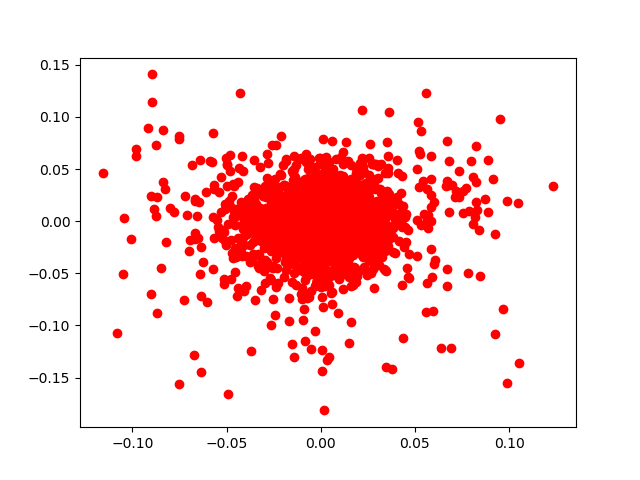

In [25]:
# Make the prediction on train
ypredict = mymodel.predict(xtrain)
#ypredict = mymodel.predict(xtrain)

# Plot the diff between prediction and target values
diff = ypredict-ytrain
#diff = ypredict-ytrain

print('X mean and stdev of diff train: ', np.mean(diff[:,0]), np.std(diff[:,0]))
print('Y mean and stdev of diff train: ', np.mean(diff[:,1]), np.std(diff[:,1]))

%matplotlib notebook
plt.plot(diff[:,0], diff[:,1],'ro')
plt.show()

X mean and stdev of diff valid:  -0.0020332645624876024 0.031297104703298315
Y mean and stdev of diff valid:  -0.0025891060173949773 0.04403058996993165


<IPython.core.display.Javascript object>


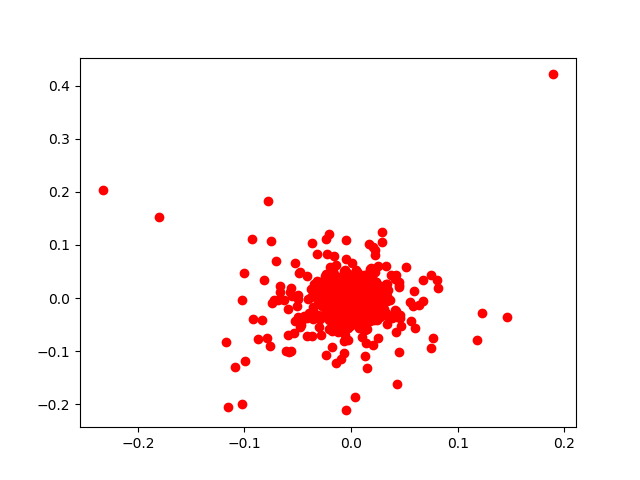

In [26]:
# Make the prediction on valid
ypredict = mymodel.predict(xvalid)
#ypredict = mymodel.predict(xtrain)

# Plot the diff between prediction and target values
diff = ypredict-yvalid
#diff = ypredict-ytrain

#diff = diff[np.where(diff[:,1]<0.4)]

print('X mean and stdev of diff valid: ', np.mean(diff[:,0]), np.std(diff[:,0]))
print('Y mean and stdev of diff valid: ', np.mean(diff[:,1]), np.std(diff[:,1]))

%matplotlib notebook
plt.plot(diff[:,0], diff[:,1],'ro')
plt.show()

In [ ]:
# Plot the diff between prediction and target values
#diff = ypredict-targetTrain
yvalidpred = mymodel.predict(xvalid)
diffvalid = yvalidpred-yvalid

print('X mean and stdev of diff: ', np.mean(diffvalid[:,0]), np.std(diffvalid[:,0]))
print('Y mean and stdev of diff: ', np.mean(diffvalid[:,1]), np.std(diffvalid[:,1]))

%matplotlib notebook
plt.plot(diffvalid[:,0], diffvalid[:,1],'ro')
plt.show()

In [ ]:
badpoints = np.where(diff[:,0] > 0.15)
print(badpoints)
yvalid[badpoints]*400


In [ ]:
#%matplotlib notebook
index=487

display = np.reshape(xvalid[index], (260,400))
box = ypredict[index]

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(display, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((box[0]*400-60,box[1]*260-60),120,120,linewidth=1,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

X mean and stdev of diff:  -0.026369484 0.020624975
Y mean and stdev of diff:  0.017491458 0.05322046


<IPython.core.display.Javascript object>


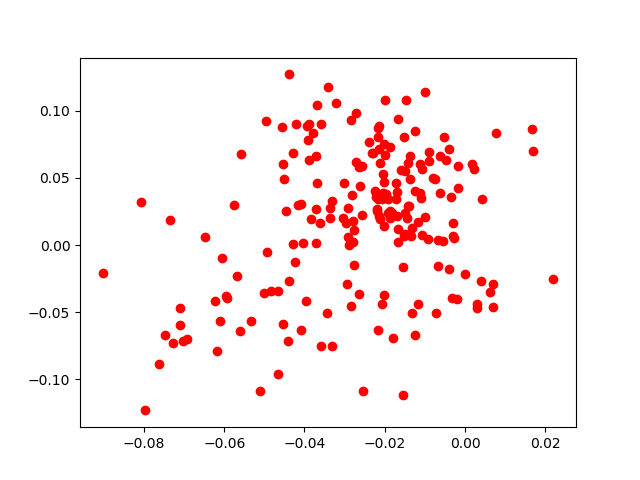

In [27]:
# Make the prediction on a totally new dataset
# Read images
newImages = np.zeros((201,260,400))

for i in range(201):
    filename = 'dataFabrice/fabriceEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    newImages[i] = img

        
newImages = np.reshape(newImages, (newImages.shape[0], newImages.shape[1], newImages.shape[2], 1))

# Rescale images
newImages = newImages/255.

targetValid = pd.read_csv('dataFabrice/fabricePupilCenter.csv')

# Remove missing values
newImages = newImages[targetValid.xcentral != '?']
targetValid = targetValid[targetValid.xcentral != '?']
targetValid = targetValid.astype('float32')

# Put target data in shape
targetValidX = targetValid['xcentral'].values.reshape((targetValid['xcentral'].shape[0], 1))
targetValidY = targetValid['ycentral'].values.reshape((targetValid['ycentral'].shape[0], 1))

# Rescale targets between 0 and 1 
targetValidX = targetValidX/400.
targetValidY = targetValidY/260.

targetValid = np.concatenate((targetValidX, targetValidY), axis=1)

# Make the prediction for valid dataset
newImagesPredict = mymodel.predict(newImages)

# Plot the diff between prediction and target values
diff = newImagesPredict-targetValid

print('X mean and stdev of diff: ', np.mean(diff[:,0]), np.std(diff[:,0]))
print('Y mean and stdev of diff: ', np.mean(diff[:,1]), np.std(diff[:,1]))

%matplotlib notebook
plt.plot(diff[:,0], diff[:,1],'ro')
plt.show()

In [31]:
badpoints = np.where(diff[:,0]<-0.05)
badpoints

(array([ 25,  26,  30,  65,  74,  75,  83,  84,  90,  92,  93,  99, 100,
        102, 107, 108, 115, 139, 144, 148, 159, 160, 173, 183, 184],
       dtype=int64),)

center prediction:  195.85142135620117 121.98887348175049


<IPython.core.display.Javascript object>


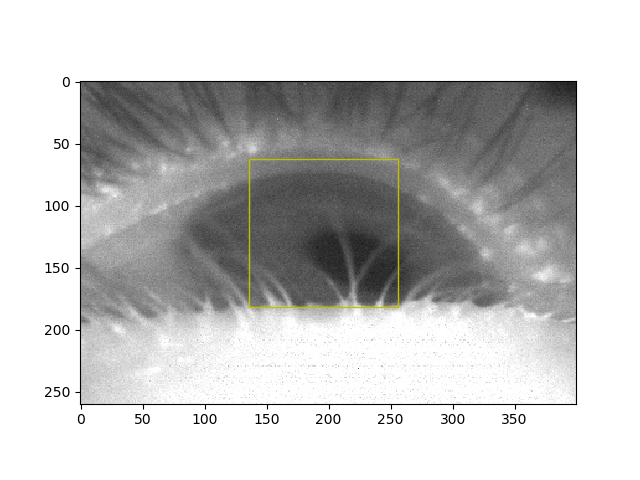

In [38]:
# Image to display
index=93

display = np.reshape(newImages[index], (260,400))
box = newImagesPredict[index]

print('center prediction: ',box[0]*400, box[1]*260)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(display, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((box[0]*400-60,box[1]*260-60),120,120,linewidth=1,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()